# PAL case study

### Notebook helper function for pretty output

In [1]:
from IPython.display import Markdown, display


def print_md(markdown_printable):
    """Pretty render Markdown."""
    display(Markdown(str(markdown_printable)))


def print_yaml_file(file_path):
    """Pretty render yaml file."""
    with open(file_path) as f:
        print_md(f"```yaml\n{f.read()}\n```")

### Plotting functions ([`pyglotaran_extras`](https://github.com/s-weigand/pyglotaran-extras/commit/20da3593105fb839f86e668dc12dc9ca87c3b9ce) + `matplotlib`)

In [2]:
import matplotlib.pyplot as plt
from pyglotaran_extras.plotting.plot_overview import plot_overview
from pyglotaran_extras.plotting.plot_svd import plot_svd
from pyglotaran_extras.plotting.style import PlotStyle

plot_style = PlotStyle()
plt.rc("axes", prop_cycle=plot_style.cycler)
plt.rcParams["figure.figsize"] = (21, 14)

### Analysis functions

In [3]:
from glotaran.analysis.optimize import optimize
from glotaran.io import load_dataset, load_model, load_parameters
from glotaran.project.scheme import Scheme

## Target Analysis split matrix

### Read data

In [4]:
dataset_open = load_dataset("PAL_700_ma_tr2_gain50_10uW_590nmfilter_21C_400nm_AV_bc_sh_sel_620_830.ascii")
dataset_closed = load_dataset("PAL_DCMU_80uM_WL_SF_700_ma_tr2_gain50_100uW_590nmfilter_21C_400nm_AV_bc_sh_sel_620_830.ascii")

### Load model and parameters

In [22]:
PAL_open_closed_target_model = load_model("models/PAL-open-closed-target-model.yml")
PAL_open_closed_target_parameters = load_parameters("models/PAL-open-closed-target-parameters.yml")
print_md(PAL_open_closed_target_model.validate(parameters=PAL_open_closed_target_parameters))

Your model is valid.

In [23]:
compartments = PAL_open_closed_target_model.initial_concentration["input1"].compartments
print_md(PAL_open_closed_target_model.megacomplex["PS1"].full_k_matrix(PAL_open_closed_target_model).matrix_as_markdown(compartments).replace("0.0000e+00",""))
print_md(PAL_open_closed_target_model.megacomplex["PS2_open"].full_k_matrix(PAL_open_closed_target_model).matrix_as_markdown(compartments).replace("0.0000e+00",""))

| compartment | s1 | s2 | s3
|---|---|---|---
| s1 | kinetic.2 | kinetic.1_1 | |
| s2 | kinetic.1 | kinetic.2 | |
| s3 | kinetic.3 |  | kinetic.2|


| compartment | s4 | s5
|---|---|---
| s4 | kinetic.2 | kinetic.4_2_open|
| s5 | kinetic.4_open | kinetic.5_open|


In [24]:
print_md(PAL_open_closed_target_model)

# Model

_Type_: kinetic-spectrum

## Initial Concentration

* **input1**:
  * *Label*: input1
  * *Compartments*: ['s1', 's2', 's3', 's4', 's5']
  * *Parameters*: [input.1, input.0, input.0, input.1, input.0]
  * *Exclude From Normalize*: []

## K Matrix

* **km1**:
  * *Label*: km1
  * *Matrix*: 
    * *('s1', 's1')*: kinetic.2
    * *('s1', 's2')*: kinetic.1_1
    * *('s2', 's1')*: kinetic.1
    * *('s2', 's2')*: kinetic.2
    * *('s3', 's1')*: kinetic.3
    * *('s3', 's3')*: kinetic.2
  
* **km_closed**:
  * *Label*: km_closed
  * *Matrix*: 
    * *('s4', 's4')*: kinetic.2
    * *('s4', 's5')*: kinetic.4_2
    * *('s5', 's4')*: kinetic.4
    * *('s5', 's5')*: kinetic.5
  
* **km_open**:
  * *Label*: km_open
  * *Matrix*: 
    * *('s4', 's4')*: kinetic.2
    * *('s4', 's5')*: kinetic.4_2_open
    * *('s5', 's4')*: kinetic.4_open
    * *('s5', 's5')*: kinetic.5_open
  

## Irf

* **irf_closed** (spectral-multi-gaussian):
  * *Label*: irf_closed
  * *Type*: spectral-multi-gaussian
  * *Center*: [irf_common_closed.center, irf_common_closed.center]
  * *Width*: [gauss_1.width, gauss_2.width]
  * *Scale*: [gauss_1.scale, gauss_2.scale]
  * *Normalize*: True
  * *Backsweep*: True
  * *Backsweep Period*: irf_common_closed.backsweep
  * *Center Dispersion*: []
  * *Width Dispersion*: []
  * *Model Dispersion With Wavenumber*: False
* **irf_open** (spectral-multi-gaussian):
  * *Label*: irf_open
  * *Type*: spectral-multi-gaussian
  * *Center*: [irf_common_open.center, irf_common_open.center]
  * *Width*: [gauss_1.width, gauss_2.width]
  * *Scale*: [gauss_1.scale, gauss_2.scale]
  * *Normalize*: True
  * *Backsweep*: True
  * *Backsweep Period*: irf_common_closed.backsweep
  * *Center Dispersion*: []
  * *Width Dispersion*: []
  * *Model Dispersion With Wavenumber*: False

## Dataset

* **dataset_open**:
  * *Label*: dataset_open
  * *Megacomplex*: ['PS1', 'PS2_open']
  * *Megacomplex Scale*: [mc_scale.PS1, mc_scale.PS2]
  * *Scale*: dataset_scale.open_scale
  * *Initial Concentration*: input1
  * *Irf*: irf_open
* **dataset_closed**:
  * *Label*: dataset_closed
  * *Megacomplex*: ['PS1', 'PS2_closed']
  * *Megacomplex Scale*: [mc_scale.PS1, mc_scale.PS2]
  * *Scale*: dataset_scale.closed_scale
  * *Initial Concentration*: input1
  * *Irf*: irf_closed

## Megacomplex

* **PS1**:
  * *Label*: PS1
  * *K Matrix*: ['km1']
* **PS2_open**:
  * *Label*: PS2_open
  * *K Matrix*: ['km_open']
* **PS2_closed**:
  * *Label*: PS2_closed
  * *K Matrix*: ['km_closed']

## Weights

* 
  * *Datasets*: ['dataset_open', 'dataset_closed']
  * *Global Interval*: [780, 1000]
  * *Value*: 0.3

## Spectral Constraints

* **zero**:
  * *Type*: zero
  * *Compartment*: s2
  * *Interval*: [[1, 690]]
* **zero**:
  * *Type*: zero
  * *Compartment*: s3
  * *Interval*: [[1, 1000]]
* **zero**:
  * *Type*: zero
  * *Compartment*: s5
  * *Interval*: [[1, 1000]]



### Create scheme and optimize it

In [25]:
PAL_open_closed_target_scheme = Scheme(
    PAL_open_closed_target_model, 
    PAL_open_closed_target_parameters, 
    {"dataset_open": dataset_open, "dataset_closed": dataset_closed}, 
    non_negative_least_squares=True,
)
PAL_open_closed_target_result = optimize(PAL_open_closed_target_scheme)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.1377e+08                                    1.99e+10    
       1              2         1.2889e+07      1.01e+08       1.10e+01       4.26e+09    
       2              9         1.0934e+07      1.95e+06       3.64e-03       2.00e+08    
       3             11         1.0611e+07      3.23e+05       1.82e-03       1.46e+08    
       4             13         1.0446e+07      1.64e+05       9.10e-04       1.48e+08    
       5             14         1.0309e+07      1.37e+05       1.82e-03       1.93e+08    
       6             15         1.0227e+07      8.20e+04       3.64e-03       2.21e+07    
       7             16         1.0209e+07      1.84e+04       7.28e-03       7.79e+06    
       8             17         1.0192e+07      1.66e+04       1.46e-02       1.27e+07    
       9             18         1.0170e+07      2.27e+04       2.91e-02       3.27e+07    

In [26]:
PAL_open_closed_target_result.data["dataset_open"]

<xarray.Dataset>
Dimensions:                                   (clp_label: 5, component_PS1: 3, component_PS2_open: 2, from_species: 3, left_singular_value_index: 103, right_singular_value_index: 103, singular_value_index: 103, species: 5, spectral: 103, time: 1024, to_species: 3)
Coordinates:
  * from_species                              (from_species) <U2 's1' 's2' 's3'
  * to_species                                (to_species) <U2 's1' 's2' 's3'
  * species                                   (species) <U2 's1' 's2' ... 's5'
  * time                                      (time) float64 0.0 ... 799.7
  * spectral                                  (spectral) float64 619.9 ... 827.8
  * clp_label                                 (clp_label) <U2 's1' 's2' ... 's5'
    rate                                      (component_PS1) float64 -0.2569...
    lifetime                                  (component_PS1) float64 -3.893 ...
Dimensions without coordinates: component_PS1, component_PS2_open, left_singular_value_index, right_singular_value_index, singular_value_index
Data variables: (12/30)
    data                                      (time, spectral) float64 0.5 .....
    data_left_singular_vectors                (time, left_singular_value_index) float64 ...
    data_singular_values                      (singular_value_index) float64 ...
    data_right_singular_vectors               (right_singular_value_index, spectral) float64 ...
    weight                                    (time, spectral) float64 1.0 .....
    weighted_data                             (time, spectral) float64 0.5 .....
    ...                                        ...
    a_matrix_PS2_open                         (component_PS2_open, species) float64 ...
    k_matrix_PS2_open                         (to_species, from_species) float64 ...
    k_matrix_reduced_PS2_open                 (to_species, from_species) float64 ...
    irf_center                                float64 99.65
    irf_width                                 float64 4.706
    irf                                       (time) float64 0.04343 ... 5.38...
Attributes:
    root_mean_square_error:           5.041581388229811
    weighted_root_mean_square_error:  4.756046881846241

In [27]:
PAL_open_closed_target_result.data["dataset_closed"]

<xarray.Dataset>
Dimensions:                                   (clp_label: 5, component_PS1: 3, component_PS2_closed: 2, from_species: 3, left_singular_value_index: 103, right_singular_value_index: 103, singular_value_index: 103, species: 5, spectral: 103, time: 1024, to_species: 3)
Coordinates:
  * from_species                              (from_species) <U2 's1' 's2' 's3'
  * to_species                                (to_species) <U2 's1' 's2' 's3'
  * species                                   (species) <U2 's1' 's2' ... 's5'
  * time                                      (time) float64 0.0 ... 799.7
  * spectral                                  (spectral) float64 619.9 ... 827.8
  * clp_label                                 (clp_label) <U2 's1' 's2' ... 's5'
    rate                                      (component_PS1) float64 -0.2569...
    lifetime                                  (component_PS1) float64 -3.893 ...
Dimensions without coordinates: component_PS1, component_PS2_closed, left_singular_value_index, right_singular_value_index, singular_value_index
Data variables: (12/30)
    data                                      (time, spectral) float64 2.25 ....
    data_left_singular_vectors                (time, left_singular_value_index) float64 ...
    data_singular_values                      (singular_value_index) float64 ...
    data_right_singular_vectors               (right_singular_value_index, spectral) float64 ...
    weight                                    (time, spectral) float64 1.0 .....
    weighted_data                             (time, spectral) float64 2.25 ....
    ...                                        ...
    a_matrix_PS2_closed                       (component_PS2_closed, species) float64 ...
    k_matrix_PS2_closed                       (to_species, from_species) float64 ...
    k_matrix_reduced_PS2_closed               (to_species, from_species) float64 ...
    irf_center                                float64 116.7
    irf_width                                 float64 4.706
    irf                                       (time) float64 0.03518 ... 2.07...
Attributes:
    root_mean_square_error:           13.756786963618344
    weighted_root_mean_square_error:  12.898871157514414

### Result plots

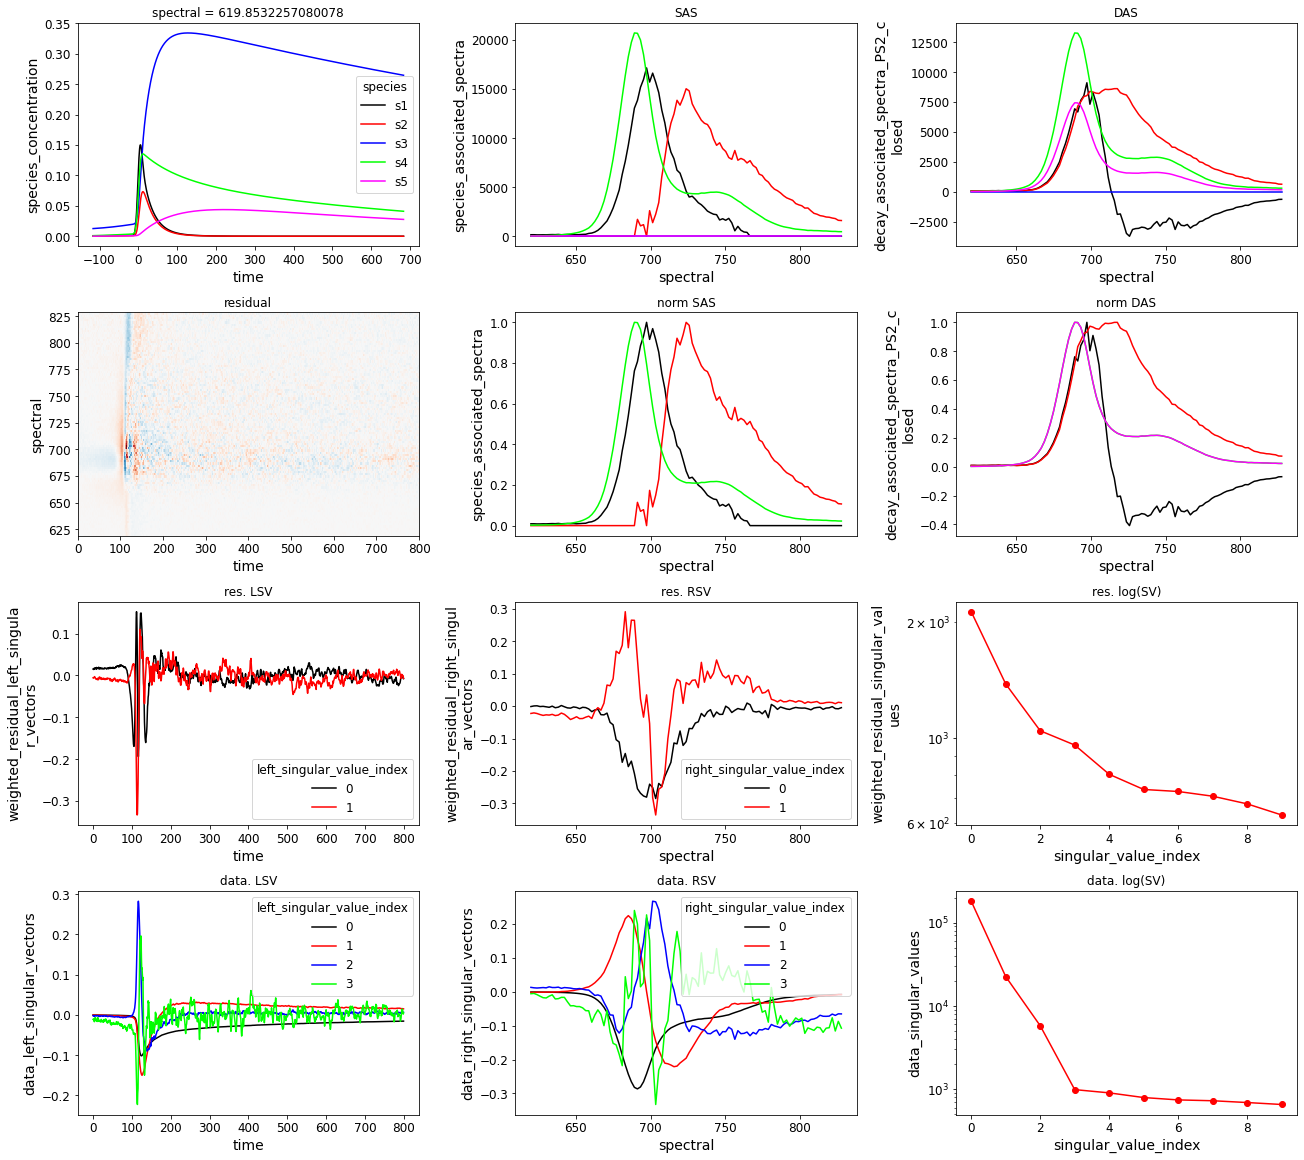

In [28]:
plot_overview(PAL_open_closed_target_result.data["dataset_closed"], linlog=False);

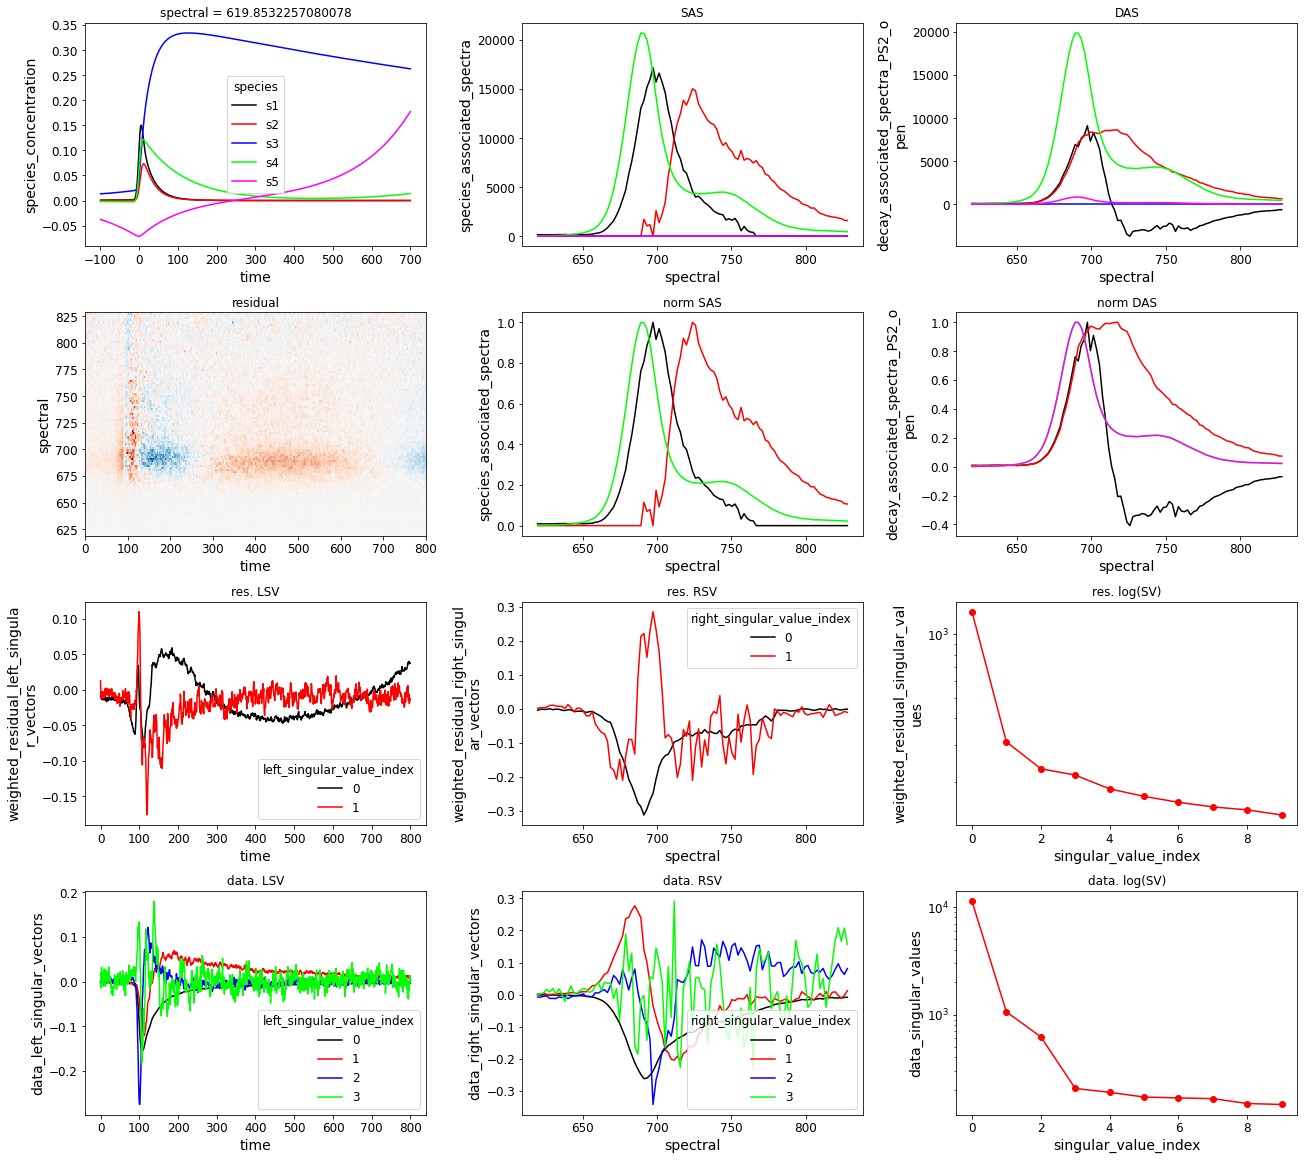

In [30]:
plot_overview(PAL_open_closed_target_result.data["dataset_open"], linlog=False);

In [29]:
print_md(PAL_open_closed_target_result.optimized_parameters)

  * __dataset_scale__:

    | _Label_      |   _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |--------------|-----------|-------------|---------|---------|----------|------------------|----------|
    | open_scale   | 0.0936293 | 1.22341e-05 |    -inf |     inf | True     | False            | None     |
    | closed_scale | 1         | 0           |    -inf |     inf | False    | False            | None     |

  * __gauss_1__:

    | _Label_   |   _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|-------------|---------|---------|----------|------------------|----------|
    | width     |   4.70637 | 0.000294603 |    -inf |     inf | True     | False            | None     |
    | scale     |   1       | 0           |    -inf |     inf | False    | False            | None     |

  * __gauss_2__:

    | _Label_   |    _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|------------|-------------|---------|---------|----------|------------------|----------|
    | width     | 93.574     | 0.0647963   |    -inf |     inf | True     | False            | None     |
    | scale     |  0.0765702 | 2.95146e-05 |    -inf |     inf | True     | False            | None     |

  * __input__:

    |   _Label_ |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    |         1 |         1 |          0 |    -inf |     inf | False    | False            | None     |
    |         0 |         0 |          0 |    -inf |     inf | False    | False            | None     |

  * __irf_common_closed__:

    | _Label_   |   _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|-------------|---------|---------|----------|------------------|----------|
    | center    |   116.697 | 0.000340381 |    -inf |     inf | True     | False            | None     |
    | backsweep | 13800     | 0           |    -inf |     inf | False    | False            | None     |

  * __irf_common_open__:

    | _Label_   |    _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|------------|------------|---------|---------|----------|------------------|----------|
    | center    |    99.6516 | 0.00191556 |    -inf |     inf | True     | False            | None     |
    | backsweep | 13800      | 0          |    -inf |     inf | False    | False            | None     |

  * __kinetic__:

    | _Label_   |     _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_                  |
    |-----------|-------------|-------------|---------|---------|----------|------------------|-------------------------|
    | 1         |  0.087      | 0           |    -inf |     inf | False    | False            | None                    |
    | 1_1       |  0.1392     | 0           |    -inf |     inf | False    | False            | $kinetic.1 * $scaling.1 |
    | 2         |  0.0005     | 0           |    -inf |     inf | False    | False            | None                    |
    | 3         |  0.066      | 0           |    -inf |     inf | False    | False            | None                    |
    | 4         |  0.0044019  | 1.91109e-06 |    -inf |     inf | True     | False            | None                    |
    | 4_2       |  0.00541203 | 0           |    -inf |     inf | False    | False            | $kinetic.4 * $scaling.2 |
    | 5         |  0.00235751 | 6.09918e-07 |    -inf |     inf | True     | False            | None                    |
    | 4_open    |  0.00858463 | 3.30395e-06 |    -inf |     inf | True     | False            | None                    |
    | 5_open    | -0.00756697 | 2.79182e-06 |    -inf |     inf | True     | False            | None                    |
    | 4_2_open  |  0.00125873 | 3.57665e-06 |    -inf |     inf | True     | False            | None                    |

  * __mc_scale__:

    | _Label_   |   _Value_ |   _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|------------|---------|---------|----------|------------------|----------|
    | PS1       |       0.7 |          0 |    -inf |     inf | False    | False            | None     |
    | PS2       |       0.3 |          0 |    -inf |     inf | False    | False            | None     |

  * __scaling__:

    |   _Label_ |   _Value_ |    _StdErr_ |   _Min_ |   _Max_ | _Vary_   | _Non-Negative_   | _Expr_   |
    |-----------|-----------|-------------|---------|---------|----------|------------------|----------|
    |         1 |   1.6     | 0           |    -inf |     inf | False    | False            | None     |
    |         2 |   1.22948 | 0.000243109 |    -inf |     inf | True     | False            | None     |

